In [1]:
import numpy.random as rd
import matplotlib.pyplot as plt
from math import *
import ipywidgets as widgets

# Le modèle de percolation

Le modèle de percolation permet de décrire différentes situations physiques : il permet par exemple d’étudier les propriétés d’écoulement d’un fluide à traveux un milieu poreux (d’où le nom percolation), mais peut aussi être uti- lisé pour décrire la propagation de feux de forêts ou d’épidémies.

On se place sur $\mathbb{Z}^2$, chaque point $x\in \mathbb{Z}^2$ représentant une petite zone de la roche (on peut par exemple identifier $x=(x_1,x_2)\in \mathbb{Z}^2$ avec la zone $[x_1,x_1+1[ \, \times\, [x_1,x_1+1[$). 
Maintenant, on se donne un paramètre $p\in [0,1]$ et on considère des variables aléatoires indépendantes $(X_x)_{x\in \mathbb{Z}^2}$ de Bernoulli de paramètre $p$, associées à chaque $x\in \mathbb{Z}^2$. Si $X_x =1$, on dira que *le site $x$ est ouvert*, c'est-à-dire peut laisser passer un liquide; si en revanche $X_x=0$, on dira que *le site $x$ est fermé*, c'est-à-dire ne laisse pas passer de liquide.

On va alors se demander si un liquide versé en un point $x$ se répandra loin ou s'il sera bloqué par des sites fermés.

En pratique, pour les simulations, on ne va considérer que les sites $x\in [0,n[^2 \cap \mathbb{Z}^2$; pour simplifier, on appellera
$[0,n[^2 \cap \mathbb{Z}^2$ la "boîte" de taille $n$.

## Représentation graphique d'une "grille" de percolation

On écrit une fonction qui génère une ''percolation''  de paramètre $p$ dans la boîte $B_n$:
il renvoie une matrice $A$ de taille $n\times n$ où $A_{i,j}=1$ si le point $(i,j) \in \mathbb{Z}^2$ est ouvert.

In [2]:
def Bern(p):
    x=0
    if rd.random()<p:
        x=1
    return x

def Percolation(n,p):
    return [[Bern(p) for j in range(n)] for i in range(n)]

In [3]:
Percolation(8,0.3)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0]]

Maintenant, on écrit une fonction qui dessine la configuration de percolation: il place une case noire en $(i,j)$
si $A_{i,j}=1$, c'est-à-dire si le site $(i,j)$ est ouvert.

In [4]:
def Image(A,p):
    k=len(A)
    if k<20:
        taille=4,4
    elif k<50:
        taille=6,6
    else:
        taille=8,8
    fig, ax = plt.subplots(figsize=(taille))
    fig = plt.imshow(A, interpolation='nearest',cmap='Greys')
    ax.set_title("Percolation dans un carré de côté n={}, avec paramètre p={}".format(k,p))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

Dessinons maintenant des configurations de percolation pour différentes valeurs de $n$ et $p$. 
La manière dont les dessins sont construits peut être interprétée de la manière suivante:
pour chaque carré, on tire une variable de Bernoulli de paramètre $p$, et on le colorie en noir si la variable vaut $1$ (c'est-à-dire si le site est ouvert).

Vous pouvez exécuter de nouveau la cellule pour obtenir des tirages différents, en changeant aussi les valeurs de $n$ et $p$.

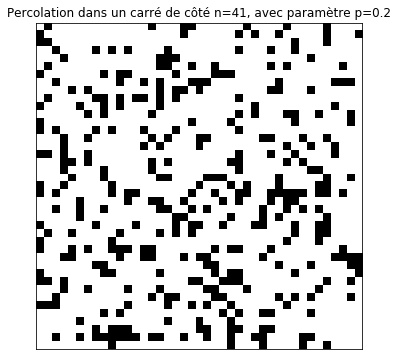

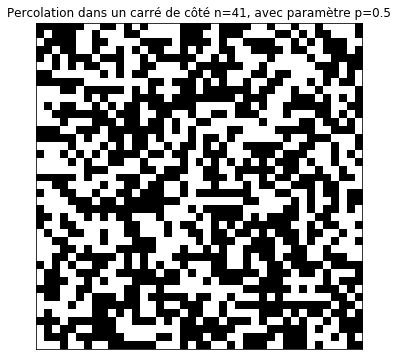

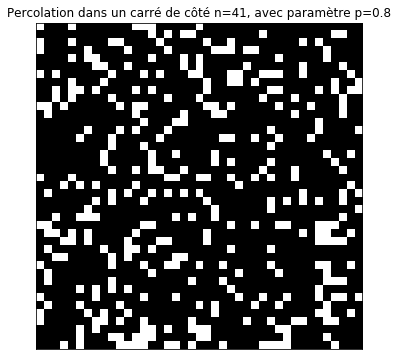

In [5]:
n,p=41,0.2
Image(Percolation(n,p),p)

n,p=41,0.5
Image(Percolation(n,p),p)

n,p=41,0.8
Image(Percolation(n,p),p)

On peut faire varier le paramètre $p$ pour voir comment les propriétés du dessin évoluent. Pour $p=0$, il n'y a aucun site ouvert (aucun carré noir), et en augmentant $p$, on augmente (de manière aléatoire) le nombre de site ouvert;
en moyenne, il y a une proportion $p$ de sites ouverts.

In [7]:
n=50
U=[[rd.random() for i in range(n)] for j in range(n)]
def Perco(p):
    n=len(U)
    A=[[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            if U[i][j]<p:
                A[i][j]=1
    Image(A,p)
wid1=widgets.FloatSlider(value=0.5,min=0,max=0.99,step=0.01)
widgets.interact(Perco, p=wid1)

interactive(children=(FloatSlider(value=0.5, description='p', max=0.99, step=0.01), Output()), _dom_classes=('…

<function __main__.Perco(p)>

Dans le dessin ci-dessus, les variables aléatoires de Bernoulli avec des paramètres $p$ différents sont *couplées*: 
on a défini $X_x$ de sorte qu'elles soient des variables aléatoires de Bernoulli de paramètres $p$, mais pas indépendantes (si un site est ouvert pour un $p$ donné, il restera ouvert pour tout $p'>p$).

## Est-ce qu'un fluide pourra traverser la boîte de taille $n$?

La question que l'on se pose est de savoir si, pour une configuration de percolation donnée, un fluide pourra traverser la boîte de taille $n$. Autrement dit, si on dépose un fluide sur le dessus de la boîte, celui-ci pourra-t-il se propager (uniquement à travers des sites *ouverts*) jusqu'au bas de la boîte.

La réponse à cette question dépend évidemment de la configuration de percolation qu'on obtient, qui est aléatoire, et dont la loi dépend du paramètre $p$. Il se passe un phénomène intéressant: pour $n$ très grand,
- si $p$ est trop petit alors un liquide ne pourra presque jamais traverser la boîte, dans le sens où la probabilité que la configuration tirée laisse passer le liquide est proche de $0$;
- si $p$ est suffisamment grand alors un liquide pourra presque toujours traverser la boîte, dans le sens où la probabilité que la configuration tirée laisse passer le liquide est proche de $1$.

On appelle ce phénomène transition de phase: les propriétés de configurations de percolation changent brusquement
quand $p$ passe un *seuil critique* $p_c$ (dans la limite d'une boîte de taille $n\to\infty$). Si $p>p_c$ la roche sera suffisamment poreuse pour laisser passer le liquide (avec très grande probabilité); si $p<p_c$ la roche ne sera pas suffisamment poreuse et ne laissera pas passer le liquide (avec très grande probabilité).

### Visualisation de l'écoulement d'un fluide

Le programme suivant permettra de décrire l'écoulement d'un fluide à travers la boîte.

In [8]:
def ExploreHaut(U,p):
    n=len(U)
    Actifs=[[-1,i] for i in range(n)]     ### Actifs = sites dont on n'a pas encore exploré tous les voisins
    Explores=[[-1,i] for i in range(n)]   ### Explores = sites qui ont déjà été testés (fermés ou ouverts)
    Composante=[]                         ### Composantes = sites envahis par le liquide
    while len(Actifs)>0:
        Nouveaux=[]
        for a,b in Actifs:            
            for y in [[a+1,b],[a-1,b],[a,b+1],[a,b-1]]:
                k,l=y
                if 0<=k<n and 0<=l<n and y not in Explores:     ## Si y n'a pas été exploré/testé jusque là.
                    Explores.append(y)
                    if U[k][l]<p:                               ## Si le site est ouvert
                        Nouveaux.append(y)                      ## On le rajoute à la liste des nouveaux actifs
        Composante.append(Nouveaux)
        Actifs=Nouveaux
    return Composante

def Convert(U,C,p):
    n=len(U)
    D=[[0 for i in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            if [i,j] in C:
                D[i][j]=4
            elif U[i][j]<p:
                D[i][j]=1
    return D

Le programme suivant permet de visualiser l'écoulement du fluide.

Vous pouvez exécuter de nouveaux la cellule pour obtenir une configuration de percolation (aléatoire) différente;
vous pouvez aussi changer les paramètres (attention, cela peut prendre du temps...). Je vous conseille de prendre un paramètre $p$ entre $0,55$ et $0,62$.

In [9]:
n=50
p=0.6

V=[[rd.random() for i in range(n)] for j in range(n)]
Q=ExploreHaut(V,p)
q=len(Q)
H,Etapes=[],[]
for i in range(q):
    H+=Q[i]
    Etapes.append(Convert(V,H,p))

def Percole(t):
    Image(Etapes[t],p)
        
wid2= widgets.Play(value=0,min=0,max=q-1,step=1,description="Press play",disabled=False)
widgets.interact(Percole, t=wid2)

interactive(children=(Play(value=0, description='Press play', max=114), Output()), _dom_classes=('widget-inter…

<function __main__.Percole(t)>

Dans le dessin ci-dessus, les sites en gris clair sont les sites *ouverts* de la percolation qui n'ont pas été atteints par le liquide.

### Comparer différentes valeurs de $p$ : visualisation de la transition de phase

On modifie légèrement le programme ci-dessus pour pouvoir comparer plus facilement différentes valeurs de $p$.

In [9]:
def Composante(U,p):
    Q=ExploreHaut(U,p)
    H=[]
    for i in range(len(Q)):
        H+=Q[i]
    return H

def ExploreHaut2(U,CC,p):
    n=len(U)
    Actifs=CC.copy()
    Explores=CC.copy()
    Composante=CC.copy()
    while len(Actifs)>0:
        a,b=Actifs.pop(0)
        for y in [[a+1,b],[a-1,b],[a,b+1],[a,b-1]]:
            k,l=y
            if 0<=k<n and 0<=l<n and y not in Explores:
                Explores.append(y)
                if U[k][l]<p:                               
                    Actifs.append(y)                        
                    Composante.append(y)
    return Composante

Pour visualiser la transition de phase, on va comparer la zone inondée par le fluide pour différentes valeurs de $p$: en augmentant $p$, on ouvre de plus en plus de sites, ce qui permet au fluide d'inonder une plus grande région. On observera que la zone inondée deviendra ''d'un coup'' très grande, en général autour de $p\approx 0,6$. Si l'on considérait une boîte d'une taille gigantesque, on constaterait que le changement se ferait quasiment systématiquement autour de $p_c \approx 0,593$.

Attention, le programme prend quelques secondes. Vous pouvez exécuter de nouveau la cellule pour obtenir une autre configuration. Attention, si vous doublez la valeur de $m$, cela prendra au moins quatre à cinq fois plus de temps... (Le dessin est très joli pour m=200, mais cela prend une dizaine de minutes sur mon ordinateur.)

In [10]:
m=70
W=[[rd.random() for i in range(m)] for j in range(m)]

p0=0.5
C=Composante(W,p0)
R=[Convert(W,C,p0)]
for i in range(15):
    q=p0+(i+1)*0.01
    C=ExploreHaut2(W,C,q)
    R.append(Convert(W,C,q))

def Percole2(p):
    i=int(100*(p-p0))
    Image(R[i],p)

wid3=widgets.FloatSlider(value=p0,min=p0,max=p0+0.15,step=0.01)
widgets.interact(Percole2, p=wid3)

interactive(children=(FloatSlider(value=0.5, description='p', max=0.65, min=0.5, step=0.01), Output()), _dom_c…

<function __main__.Percole2(p)>